In [1]:
#import dependencies
import util_supervised
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [2]:
#load data
train_X, train_y, test_X, test_y = util_supervised.sup_train_test_split(util_supervised.load_feature_dataset_pca())

In [11]:
#make and fit model
m_randomforest = RandomForestClassifier()
m_randomforest.fit(train_X, train_y)
test_pred = pd.Series(m_randomforest.predict(test_X))
test_y = test_y.reset_index(drop=True)
match = sum(test_pred == test_y) 
total = len(test_pred)

print(match, "correct.", total, "total. Accuracy =", round(match/total, 2))
round(m_randomforest.score(test_X, test_y), 2)

1530 correct. 2216 total. Accuracy = 0.69


0.69

<AxesSubplot:>

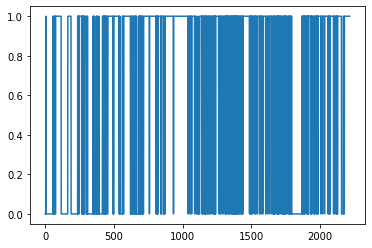

In [5]:
matches = test_pred==test_y
matches = pd.Series([int(x) for x in matches])
matches.plot()

In [6]:
#Make and fit model with bad, leaky cross-validation. 
#Should do great on training set.
m_randomforest = RandomForestClassifier()
cv_scores = cross_val_score(m_randomforest, train_X, train_y, cv=5)

In [7]:
cv_scores #ope, they're actually terrible

array([0.4207858 , 0.60329531, 0.5792142 , 0.79594423, 0.8680203 ])

In [8]:
#Make and fit model with leave-one-out cross-validation
loo = LeaveOneOut()
cv_scores = []


In [9]:
train_X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
384,0.179174,-1.333567,0.201975,-0.956108,-0.483485,0.608033,1.097710,0.030762,-0.299468,1.666730,...,-0.465095,0.867367,-0.528328,-2.348231,0.493928,0.865296,-0.232425,-0.732077,1.248882,-0.516612
385,-0.027667,-0.600343,0.954132,-1.454483,0.086165,0.383087,0.275815,1.274526,-0.273789,0.168202,...,-0.596235,0.117041,0.641153,-1.898834,-0.955622,0.104156,0.182317,-0.660946,-0.981285,-0.729896
386,1.162443,0.063443,1.443530,-0.737389,-0.401925,-0.230893,-1.630222,1.073171,-0.752724,0.532599,...,-0.364674,-1.102762,-0.239689,0.222771,2.426809,0.104644,2.295774,-2.110957,0.022939,-0.859185
387,0.821926,0.226972,2.328007,0.704615,0.306736,0.046971,-0.620694,0.815463,-1.959834,-1.411813,...,1.385481,1.422287,-0.228148,0.553741,0.209013,2.169924,0.833504,-1.698241,-0.717959,-0.105935
388,-0.018359,-0.891648,-0.427397,0.140324,-0.379426,-0.341836,-0.276706,-0.782538,0.556125,0.370798,...,0.049341,-0.919459,0.392599,-0.887140,0.070961,1.585403,1.076908,-0.036831,-0.189460,-0.691130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,1.935791,-0.055432,-0.637901,0.231761,-0.020298,0.250817,-0.426103,0.513391,-1.504860,-0.604079,...,-0.487596,1.309875,-0.497324,-2.423250,-0.715958,-1.311208,0.017888,-1.357865,0.338865,0.412108
13196,-0.229535,-1.647161,0.771516,0.168439,-2.312405,-0.184613,-0.547468,-1.425582,-0.177074,-0.233811,...,0.153623,1.016796,-1.359664,-1.707012,-1.185887,0.047499,-1.891670,0.089294,-0.067345,-1.058771
13197,2.750997,1.340967,-1.758272,0.123007,2.914670,-0.228719,3.136367,2.830693,2.830036,-0.568693,...,-0.084603,0.620138,2.813785,1.007777,-1.542409,-0.853205,1.736948,-0.964882,-0.499032,1.370998
13198,-1.177579,-1.091452,0.632508,0.190081,-2.210253,0.119259,-0.877521,-0.553816,0.679192,0.387265,...,0.550396,1.368021,-0.964334,-0.223319,-0.612350,2.165343,-0.429791,-0.717942,-1.729601,-0.751849
